In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [10]:
df = pd.read_csv(r'./data/news_articles.csv', encoding="latin", index_col=0)
df = df.dropna()
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [11]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [12]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


### **Required**
#### Run One time

In [13]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type] 

In [16]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

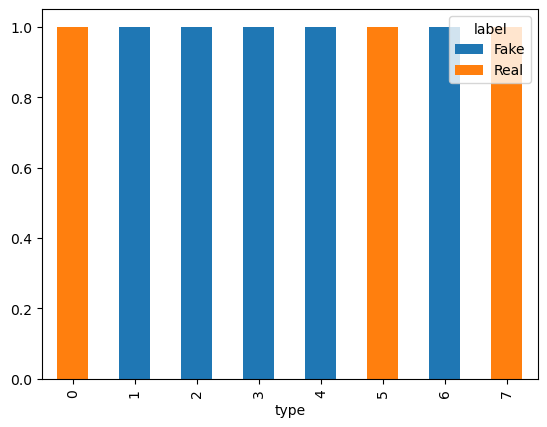

In [17]:
plot_bar(df,'type' , 'label')
plt.show()

### **Required**

In [14]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
No Author,2016-10-26T23:00:04.634+03:00,us support emboldens israel to defy intl law a...,kashmiris observes black day decades after ind...,english,presstv.ir,http://media.presstv.com/photo/20161026/b1a157...,7,Real,magnitude earthquake jolts central italy,iraq iraqi forces gather near village sin aldh...,1.0
Michael Snyder,2016-11-14T07:38:52.491+02:00,democrats are now calling for a revolution in ...,illegal immigrants are flooding across america...,english,theeconomiccollapseblog.com,http://theeconomiccollapseblog.com/wp-content/...,3,Fake,donald trump must shut federal reserve start i...,would want listen advice someone like steven s...,1.0
Admin,2016-10-28T23:31:00.000+03:00,jury finds all oregon standoff defendants not ...,indian country by theresa braine \nmore detai...,english,fromthetrenchesworldreport.com,http://www.fromthetrenchesworldreport.com/wp-c...,3,Fake,trump clinton went jeffrey epsteins sex slave ...,jewish pirates caribbean october daniel greenf...,1.0
noreply@blogger.com (Der Postillon),2016-11-16T10:36:37.549+02:00,newsticker,donnerstag november krankenhaus fÃ¼hrt opera...,german,der-postillon.com,https://1.bp.blogspot.com/-m1sd0MbuhVM/WCxKK-8...,3,Fake,neue app ruft automatisch bei ex sobald man be...,donnerstag november endlich essotankstellen bi...,1.0
Paul Joseph Watson,2016-10-28T15:51:01.860+03:00,a vote for hillary is a vote for world war,putin mocks clinton claim of russia election m...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,1,Fake,schools america closing election day due fears...,homeless woman protects trumps walk fame star ...,1.0


In [18]:
y = df1.type
x = df1.loc[:, ['site_url','text_without_stopwords']]
x['source'] = x['site_url'].astype(str) + " "+x["text_without_stopwords"]
x = x.drop(['site_url', 'text_without_stopwords'], axis=1)
x = x.source

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_vect


TfidfVectorizer(stop_words='english')

In [28]:
tfidf_train.shape

(1431, 39287)

In [29]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.954


In [30]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)


accuracy:  0.868
